In [11]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

#define the hyperparameters to be tuned
n_estimators =[50,100, 200,300]
learning_rate = [0.01,0.1,0.5]
max_depths = [3,4,5]

#make a dictionary to store the model performance
results ={}

for n in n_estimators:
    for lr in learning_rate:
        for d in max_depths:
            gdbt = GradientBoostingClassifier(n_estimators=n, learning_rate=lr, max_depth=d, random_state=42)
            gdbt.fit(X_train, y_train)
            score = gdbt.score(X_test, y_test)
            results[(n,lr,d)]=score
            
#print the best hyperparameters
best_hyper = max(results, key=results.get)
print("Best hyperparameters: ", best_hyper)
print("test set score: ", results[best_hyper])

Best hyperparameters:  (50, 0.1, 3)
test set score:  0.9444444444444444


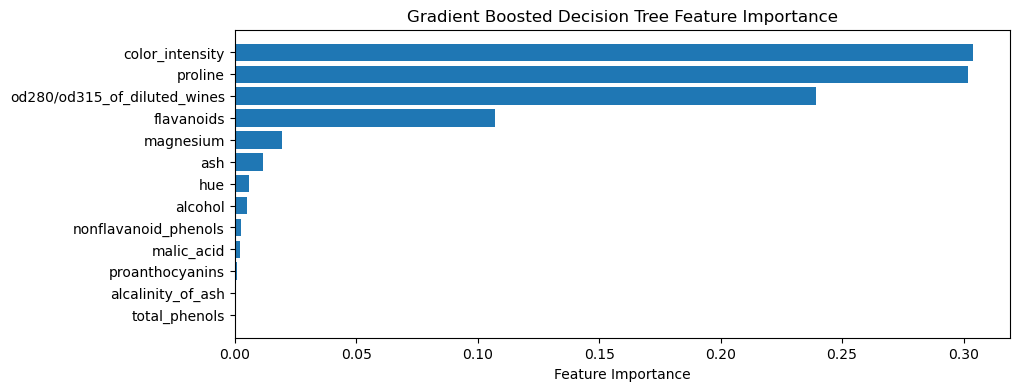

In [20]:
#train the model with best hyperparam
gdbt_tuned = GradientBoostingClassifier(n_estimators=best_hyper[0],
                                        learning_rate=best_hyper[1],
                                        max_depth=best_hyper[2],
                                        random_state=0)
gdbt_tuned.fit(X_train,y_train)

#plot the feature importances
feature_importance = gdbt_tuned.feature_importances_
feature_names = wine.feature_names
sorted_idx = np.argsort(feature_importance)
plt.figure(figsize=(10,4))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosted Decision Tree Feature Importance')
plt.show()